# Step 0: Data Preparation

In [5]:
%matplotlib inline
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [6]:
data = np.loadtxt("data/texts.csv")
n_data = len(data)

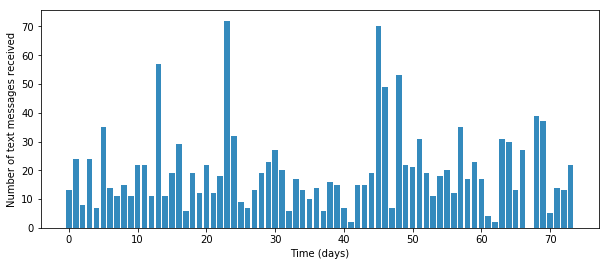

In [7]:
figsize(10, 4)
plt.bar(np.arange(n_data), data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("Number of text messages received")
plt.show()

### Collecting Mom's emails

In [8]:
import datetime
import pandas as pd

In [9]:
import imaplib
obj = imaplib.IMAP4_SSL('imap.gmail.com','993')
obj.login('email','password')
obj.select();

In [10]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [11]:
def add_emails(email_dates_list, email_ids):
    for e_id in email_ids:
        _, response = obj.fetch(e_id, '(body[header.fields (date)])')
        date_string = response[0][1]
        day = date_string.split()[2]
        month = date_string.split()[3]
        year = date_string.split()[4]
        email_dates_list.append( "%s-%s" %(year, month) )

In [12]:
email_dates_list = []
name = "suremolke"
status, response = obj.search(None, '(FROM "%s")' % name)
email_ids = [e_id for e_id in response[0].split()]
add_emails(email_dates_list, email_ids)

In [13]:
name = "suremolke2"
status, response = obj.search(None, '(FROM "%s")' % name)
email_ids = [e_id for e_id in response[0].split()]
add_emails(email_dates_list, email_ids)

In [14]:
email_dates = pd.DataFrame(email_dates_list)

In [15]:
email_dates['emails'] = 1

In [16]:
email_dates.columns = ['dates', 'emails']
email_dates.head()

,dates,emails
0,2008-Jun,1
1,2008-Jun,1
2,2008-Jun,1
3,2008-Jul,1
4,2008-Jul,1


In [17]:
data = email_dates.groupby('dates').sum()

In [18]:
data['dates'] = data.index
data = data.reset_index(drop=True)

In [19]:
data.to_pickle("data/mom_emails")

<Container object of 82 artists>

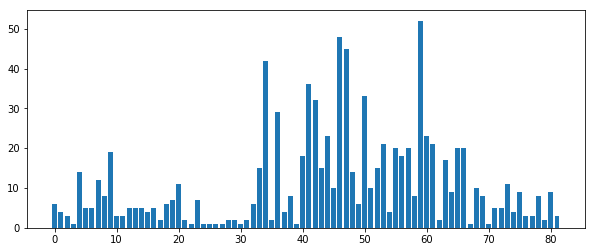

In [20]:
n_dates = len(data)
np.arange(n_dates)
plt.bar(np.arange(n_dates), list(data.emails))

In [21]:
data.head()

,emails,dates
0,6,2008-Aug
1,4,2008-Jul
2,3,2008-Jun
3,1,2008-Nov
4,14,2008-Oct


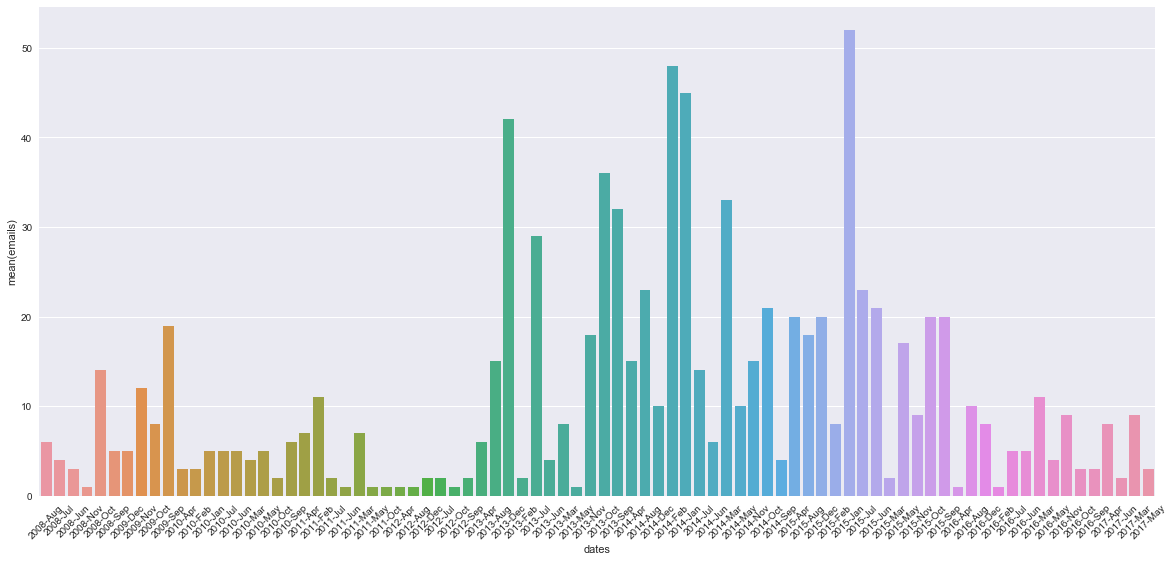

In [23]:
from IPython.core.pylabtools import figsize
import seaborn as sns
figsize(20, 9)
ax = sns.barplot(x="dates", y="emails", data=data)
for item in ax.get_xticklabels():
    item.set_rotation(45)